<a href="https://colab.research.google.com/github/SRI-CSL/SusmitJha-UMD23-SummerSchool/blob/main/Z3basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -m pip install --upgrade --user z3-solver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 MB 12.8 MB/s eta 0:00:00


In [2]:
from z3 import *

x = Int('x')
y = Int('y')

s = Solver()
s.add(x > 5)
s.add(y < 10)
s.add(x + y == 10)

print(s.check())
print(s.model())

sat
[y = 0, x = 10]


In [3]:
x = Bool("x")
x = Const("x" , BoolSort())
p, q, r = Bools("p q r") # convenience function for multiple definitions
x = Real("x")
y = Int("x") 
v = BitVec("n", 32) # 32 bit bitvector

In [4]:
s.add(Implies(p,q))
print(s.check())
print(s.model())

sat
[p = False, x = 10, y = 0]


In [9]:
# each queen is a column
Q = [ Int(f"Q_{row + 1}") for row in range(8) ]
val_c = [ And(1 <= Q[row], Q[row] <= 8) for row in range(8) ]

# At most one queen per column
col_c = [ Distinct(Q) ]

# Diagonal constraint
diag_c = [ If(i == j,
              True,
              And(Q[i] - Q[j] != i - j, Q[i] - Q[j] != j - i))
           for i in range(8) for j in range(i) ]

s1 = Solver()
s1.add(val_c)
s1.add(col_c)
s1.add(diag_c)
print(s1.check())
if s1.check() == sat:
  mdl = s1.model()
  print(mdl)

sat
[Q_3 = 8,
 Q_1 = 4,
 Q_7 = 5,
 Q_8 = 7,
 Q_5 = 1,
 Q_4 = 6,
 Q_2 = 2,
 Q_6 = 3]


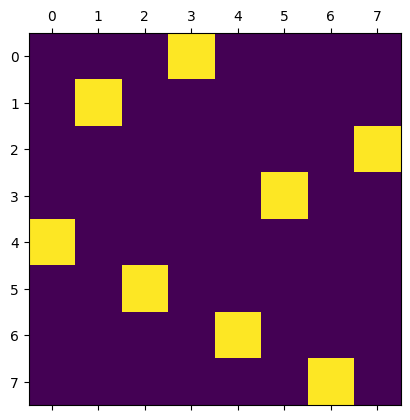

In [10]:
import numpy as np
import matplotlib.pyplot as plt

board = np.zeros((8,8))

for i in range(8):
    board[i, mdl[Q[i]].as_long() - 1] = 1

plt.matshow(board)